In [24]:
# Import necessary libraries
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model('shape_classifier_model.h5')
print("Model loaded successfully!")

# Define the class names (ensure the order matches training)
class_names = ['cylinder', 'hexagon']  # Update based on your dataset structure

# Function to count sides for hexagonal objects
def count_sides(contour, epsilon_factor=0.04):
    """
    Approximate the contour and count the number of sides.
    """
    epsilon = epsilon_factor * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    return len(approx)

# Define the function
def predict_and_display(image_path):
    """
    Predict the class of the input image, validate geometry, and display results.

    Parameters:
        image_path (str): Path to the input image.
    """
    # Load and preprocess the test image
    test_img = image.load_img(image_path, target_size=(128, 128))
    test_img_array = image.img_to_array(test_img) / 255.0
    test_img_array_expanded = np.expand_dims(test_img_array, axis=0)

    # Predict the class
    predictions = model.predict(test_img_array_expanded)
    predicted_class = np.argmax(predictions)
    predicted_label = class_names[predicted_class]

    # Load the original image for further processing
    original_img = cv2.imread(image_path)
    gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_img, threshold1=100, threshold2=200)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Cylindrical Detection Logic
    if predicted_label == "cylinder":
        # Directly classify as cylindrical without additional geometry checks
        predicted_label = "Cylindrical (Verified)"

    # Hexagonal Detection Logic
    elif predicted_label == "hexagon" and contours:
        largest_contour = max(contours, key=cv2.contourArea)
        sides = count_sides(largest_contour)

        # Validate hexagonal shape
        if sides == 6:
            predicted_label = "Hexagonal (Verified)"
        else:
            predicted_label = "Not Recognized"

    # Plot the results
    plt.figure(figsize=(12, 6))

    # First Output: Edges
    plt.subplot(1, 2, 1)
    plt.title("Edges")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    # Second Output: Original Image with Class Name
    plt.subplot(1, 2, 2)
    plt.title(predicted_label)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Show the outputs
    plt.tight_layout()
    plt.show()


Model loaded successfully!


1/1 [==============================] - 0s 45ms/step


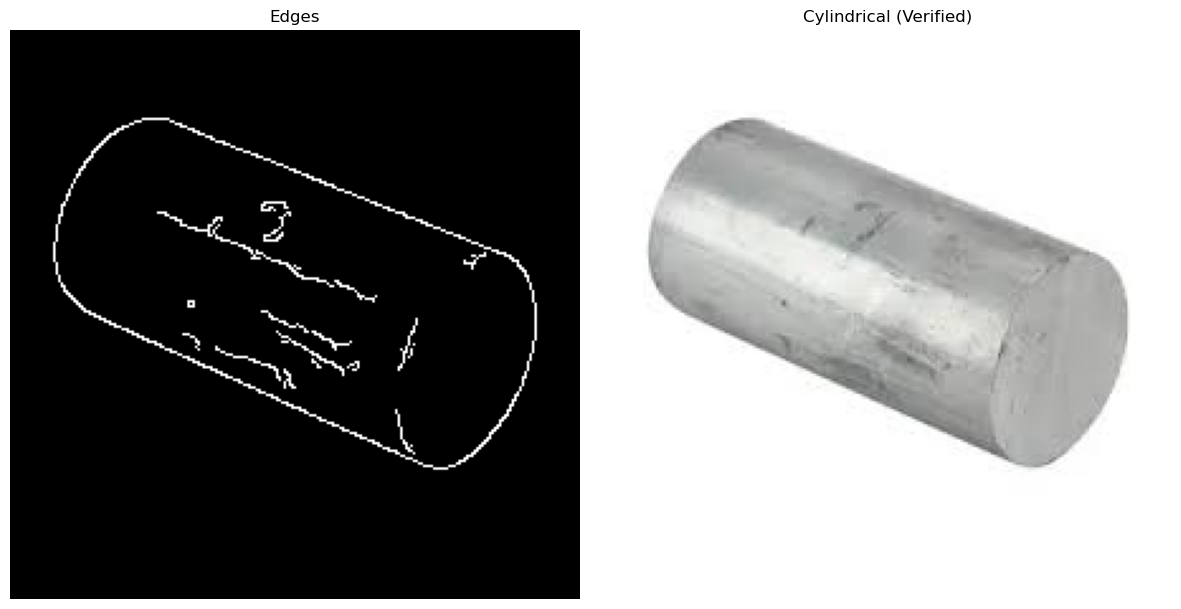

1/1 [==============================] - 0s 47ms/step


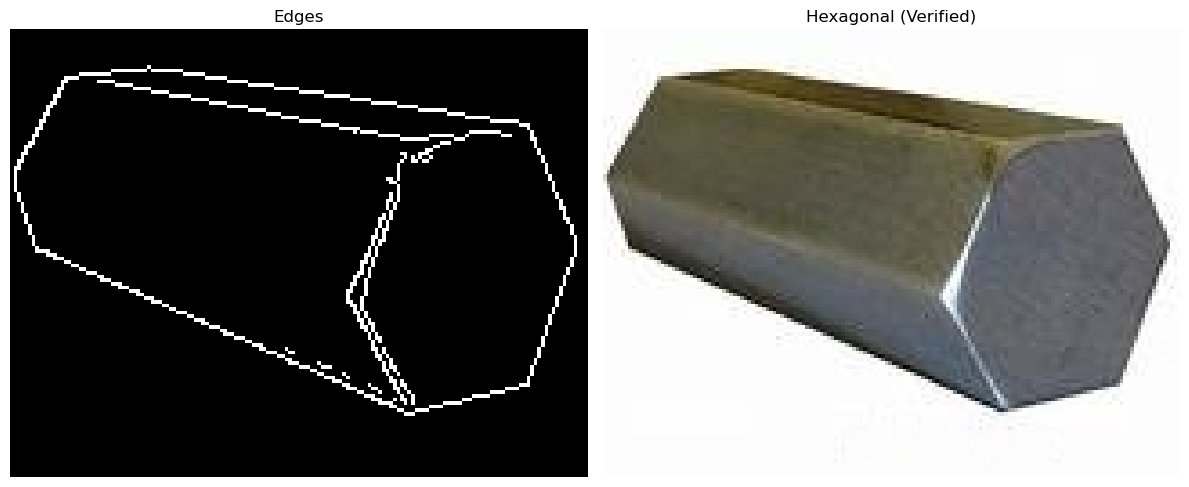

In [31]:
# Example usage
predict_and_display(r"C:\Users\seeth\Desktop\hexagonal_1\1\cylindrical\006.jpg")


test_image_path = r"C:\Users\seeth\Desktop\hexagonal_1\1\10.jpeg"  # Replace with the actual test image path
predict_and_display(test_image_path)